In [7]:
from matplotlib import pyplot as plt
import numpy as np

In [8]:
from queue_function import run_queue_experiment
from util import initialize_parallel_rngs

In [9]:
data = run_queue_experiment(rng=initialize_parallel_rngs(1, 9523)[0],
                            time=20000, arrival_rate=0.9, capacity_server=1)
print(np.mean(data.wait_times))
print(np.mean(data.n_queue))

9.581496027442084
8.709777950915466


In [10]:
#plot that shows how the mean wait time changes for multiple time intervals (so we can decide on the appropriate time)

17969
17969


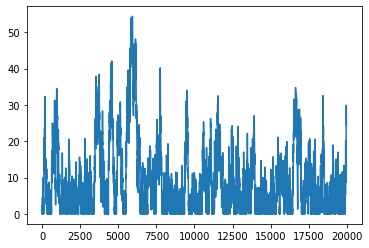

In [11]:
print(len(data.times))
print(len(data.wait_times))
#print(data.wait_times)
plt.plot(data.times, data.wait_times)
#plt.plot(data.times, data.n_queue)
#plt.hist(data.wait_times)
plt.show()

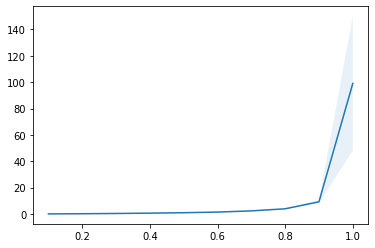

In [12]:
def vary_rho():
    capacity_server = 1
    n_runs = 10
    rhos = np.linspace(0.1 ,1, 10)
    run_data = []
    rngs = initialize_parallel_rngs(len(rhos), 89191)
    for run in range(n_runs):
        rho_data = []
        for i, rho in enumerate(rhos):
            data = run_queue_experiment(rng=rngs[i], time=20000, arrival_rate=rho*capacity_server,
                                        capacity_server=capacity_server)
            rho_data.append(np.mean(data.wait_times))
        run_data.append(rho_data)
    run_data = np.array(run_data)
    return run_data, rhos

run_data, rhos = vary_rho()
run_data_mean = np.mean(run_data, axis=0)
run_data_std = np.std(run_data, axis=0, ddof=1)
plt.plot(rhos, run_data_mean)
plt.fill_between(rhos, run_data_mean - run_data_std, run_data_mean + run_data_std, alpha=0.1)
plt.show()

In [13]:
import multiprocessing as mp
import queue
from queue_function import vary_t_worker

def vary_t(min_exp, max_exp, seed, arrival_rate, capacity_server, n_server=1, steps=6, n_runs=50):
    manager = mp.Manager()
    results = manager.list()
    t_range = np.logspace(min_exp, max_exp, num=((max_exp - min_exp) + 1)*steps, dtype=int)
    
    work_queue = mp.Queue()
    for i in range(n_runs):
        results.append(manager.list())
        for t in t_range:
            work_queue.put((t, i))
    
    rngs = initialize_parallel_rngs(mp.cpu_count(), seed)
    processes = []

    for i in range(mp.cpu_count()):
        p = mp.Process(target=vary_t_worker, args=(
            work_queue, results, rngs[i], arrival_rate, capacity_server, n_server
        ))
        p.daemon = True
        p.start()
        processes.append(p)

    for p in processes:
        p.join()

    return results, t_range

In [14]:
vary_t_results, t_range = vary_t(min_exp=3, max_exp=6, seed=8539, arrival_rate=0.8, capacity_server=1,
                                 n_runs=10)

Process Process-5:
Process Process-4:
Traceback (most recent call last):
Process Process-2:
Traceback (most recent call last):
  File "/home/soud/UvA/Stochastic Simulation/Stochastic_assignment_2/queue_function.py", line 35, in source
    yield env.timeout(t)
Process Process-3:
  File "/usr/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/home/soud/UvA/Stochastic Simulation/Stochastic_assignment_2/queue_function.py", line 55, in customer
    yield env.timeout(tib)
  File "/home/soud/.local/lib/python3.8/site-packages/simpy/events.py", line 237, in __init__
    self._delay = delay
  File "/usr/lib/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
Traceback (most recent call last):
KeyboardInterrupt
  File "/home/soud/.local/lib/python3.8/site-packages/simpy/resources/resource.py", line 89, in __exit__
    self.resource.release(self)
  File "/home/soud/.local/l

KeyboardInterrupt: 

KeyboardInterrupt
Traceback (most recent call last):
  File "/usr/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/usr/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()

The above exception was the direct cause of the following exception:

  File "/home/soud/.local/lib/python3.8/site-packages/simpy/core.py", line 190, in step
    self._now, _, _, event = heappop(self._queue)
  File "/usr/lib/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
Traceback (most recent call last):
  File "/usr/lib/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
KeyboardInterrupt
  File "/home/soud/UvA/Stochastic Simulation/Stochastic_assignment_2/queue_function.py", line 85, in vary_t_worker
    queue_data = run_queue_experiment(rng, t, arrival_rate, capacity_server,
  File "/usr/lib/python3.8/multiprocessing/process.py", line 315,